In [138]:
#from lhu80_hw1 import *
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.datasets import load_credit
from yellowbrick.classifier import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from six import StringIO
import pydotplus
from sklearn.svm import SVC
from IPython.display import Image
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,train_test_split, cross_val_score, GridSearchCV, cross_validate, train_test_split, cross_val_predict,ShuffleSplit, learning_curve
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz



## CS7641 Assignment 1: Supervised Learning
Author: Leyi Hu

----------------------------------------------------------------------------------------------------------------------
### Why:
The purpose of this project is to explore some techniques in supervised learning. It is important to realize that understanding an algorithm or technique requires understanding how it behaves under a variety of circumstances. As such, you will be asked to "implement" some simple learning algorithms (for sufficiently small values of implement, meaning I don't really want you to implement anything at all), and to compare their performance.

### Procedure:
    1.Data Explotary Analysis
    2.Implement five learning algorithm:
        2.1.Decision trees 
        2.2.Neural Network 
        2.3.Boosting
        2.4.Support Vector Machines
        2.5.k-Nearest Neighbors  
    3.Model Anylsis 
    
#### 1.Dataset Introduction:

##### Dataset 1 Breast Cancer Wisconsin(Diagnostic) Data Set:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
Attribute Information:  
-    1)      ID number 
-    2)      Diagnosis (M = malignant, B = benign) 
-    3)      Ten real-valued features are computed for each cell nucleus
Ten real-valued features are computed for each cell nucleus:
        - a) radius (mean of distances from center to points on the perimeter) 
        - b) texture (standard deviation of gray-scale values) 
        - c) perimeter 
        - d) area 
        - e) smoothness (local variation in radius lengths) 
        - f) compactness (perimeter^2 / area - 1.0) 
        - g) concavity (severity of concave portions of the contour) 
        - h) concave points (number of concave portions of the contour) 
        - i) symmetry 
        - j) fractal dimension ("coastline approximation" - 1)

###### General Statistics of Dataset1:
- All feature values are recoded with four significant digits.
- The mean, standard error and "worst" or largest(mean of the three largest values) of these features were computed for each image, resulting in 30 features.
- Missing attribute values: none
- Class distribution: 357 benign, 212 malignant

##### Dataset 2  Wine Quality - Red:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Attribute Information:

- 1) - fixed acidity
- 2) - volatile acidity
- 3) - citric acid
- 4) - residual sugar
- 5) - chlorides
- 6) - free sulfur dioxide
- 7) - total sulfur dioxide
- 8) - density
- 9) - pH
- 10) - sulphates
- 11) - alcohol
- Output variable (based on sensory data): 12 - quality (score between 0 and 10)

###### General Statistics of Dataset2:
- Number of Instances: 1595



## Data Loading and Exploratory Data Analysis

Let's load the data and explore the dataset

##### Dataset1

In [139]:
data1 = pd.read_csv('data.csv')

In [140]:
data1.shape

(569, 32)

In [141]:
data1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [142]:
# Quick glimpse of tumor features in relation to diagnosis
data1.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [143]:
# create to dataframes - one for benign, one for malignant
bcdf_b = data1[data1['diagnosis'] == 'B']
bcdf_m = data1[data1['diagnosis'] == 'M']


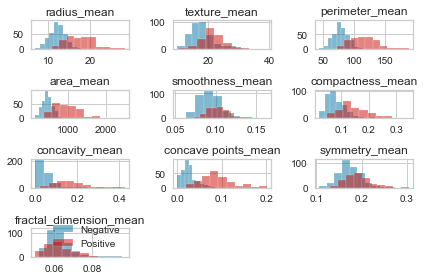

In [144]:
fig = plt.figure()
# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(data1.columns[2:12])):
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    ax = fig.add_subplot(4,3,i)
    ax.hist(bcdf_b[b], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bcdf_m[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

##### Dataset2

In [145]:
data2 = pd.read_csv('winequality-red.csv')

In [146]:
data2.shape

(1599, 12)

In [147]:
data2.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [148]:
data2.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


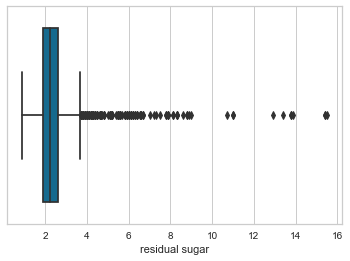

In [149]:
sns.boxplot(data2['residual sugar'])

No handles with labels found to put in legend.


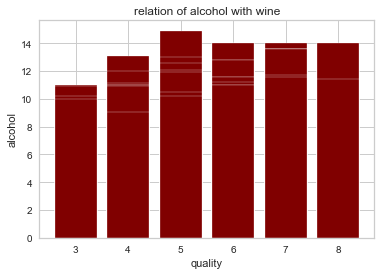

In [150]:
plt.bar(data2['quality'], data2['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [151]:
data2['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Check the Correlation

##### Dataset1

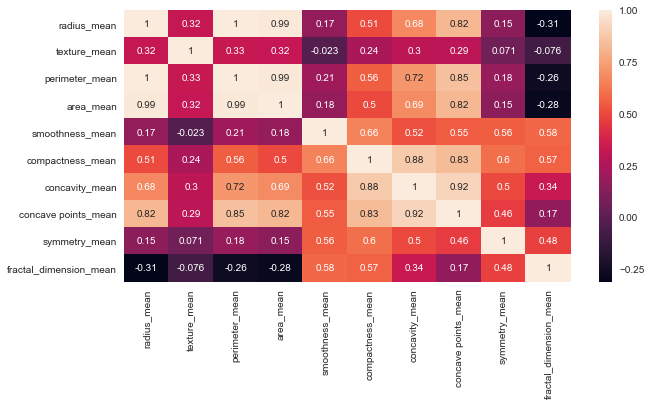

In [152]:
# Quick visualization of relationships between features and diagnoses
df_temp = data1 
conditions = [
    (df_temp['diagnosis'] == 'B'),
    (df_temp['diagnosis'] == 'M')]

values = [0, 1]
df_temp['diagnosis'] = np.select(conditions, values)
#df_temp= df_temp.drop(['id'],axis=1)
plt.figure(figsize=(10,5))
df_temp = df_temp.drop(['id','diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1)
sns.heatmap(df_temp.corr(),annot=True)
plt.ioff()


##### Dataset2

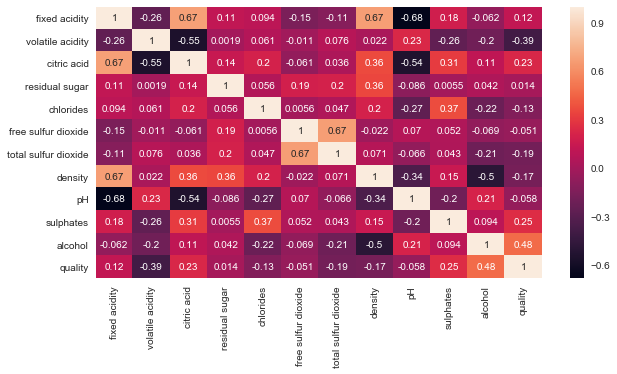

In [153]:
plt.figure(figsize=(10,5))
sns.heatmap(data2.corr(), annot = True)
plt.ioff()


## Data Preprocessing 

#### Dataset1

In [154]:
data1['diagnosis'] = np.select(conditions, values)

In [155]:
X = data1.loc[:, 'radius_mean':'fractal_dimension_worst']
y = data1['diagnosis']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

455
114
455
114


In [157]:
model_dummy = DummyClassifier(strategy="uniform", random_state=1)
model_dummy.fit(X_train, y_train)

DummyClassifier(random_state=1, strategy='uniform')

In [158]:
y_predict_dummy = model_dummy.predict(X_test)
print(f'Baseline Accuracy Score: {accuracy_score(y_test, y_predict_dummy) * 100:.2f}%')
print(f'Baseline Precision Score: {precision_score(y_test, y_predict_dummy) * 100:.2f}%')

Baseline Accuracy Score: 47.37%
Baseline Precision Score: 35.94%


In [159]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict_dummy),
    columns=['Predicted Positive', 'Predicted Negative'],
    index=['True Positive', 'True Negative']
)

,Predicted Positive,Predicted Negative
True Positive,31,41
True Negative,19,23


In [160]:
print(classification_report(y_test, y_predict_dummy))

              precision    recall  f1-score   support

           0       0.62      0.43      0.51        72
           1       0.36      0.55      0.43        42

    accuracy                           0.47       114
   macro avg       0.49      0.49      0.47       114
weighted avg       0.52      0.47      0.48       114



In [161]:
cr_dummy = classification_report(y_test, y_predict_dummy, output_dict=True)
df_cr_dummy = pd.DataFrame(cr_dummy).transpose()
df_cr_dummy

,precision,recall,f1-score,support
0,0.620000,0.430556,0.508197,72.000000
1,0.359375,0.547619,0.433962,42.000000
accuracy,0.473684,0.473684,0.473684,0.473684
macro avg,0.489687,0.489087,0.471079,114.000000
weighted avg,0.523980,0.473684,0.480847,114.000000


#### Dataset2

In [162]:
data2['quality'] = data2['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [163]:
# analyzing the different values present in the dependent variable(quality column)
data2['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data2['quality'] = le.fit_transform(data2['quality'])
data2['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64>

In [165]:
# Define features X
X2 = np.asarray(data2.iloc[:,:-1])
# Define target y
y2 = np.asarray(data2['quality'])
print(X2.shape)
print(y2.shape)

(1599, 11)
(1599,)


In [166]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state=44)
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [167]:
# standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)

In [168]:
model_dummy2 = DummyClassifier(strategy="uniform", random_state=1)
model_dummy2.fit(X_train2, y_train2)
y_predict_dummy2 = model_dummy2.predict(X_test2)
print(f'Baseline Accuracy Score: {accuracy_score(y_test2, y_predict_dummy2) * 100:.2f}%')
print(f'Baseline Precision Score: {precision_score(y_test2, y_predict_dummy2) * 100:.2f}%')

Baseline Accuracy Score: 48.00%
Baseline Precision Score: 46.97%


In [169]:
pd.DataFrame(
    confusion_matrix(y_test2, y_predict_dummy2),
    columns=['Predicted Positive', 'Predicted Negative'],
    index=['True Positive', 'True Negative']
)

,Predicted Positive,Predicted Negative
True Positive,99,105
True Negative,103,93


## 2.1 Decision trees 
----------------------------------------------------------------------------------------------------------------------
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Reference: 
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://mer.vin/2019/08/machine-learning-with-tree-based-models-in-python/

#### Dataset1

In [100]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
dt_accuracy =accuracy_score(y_test, y_pred)
print('Accuracy of decision tree of dataset1 without hyperparameter tuning is %.2f%%' % (dt_accuracy*100))

Accuracy of decision tree of dataset1 without hyperparameter tuning is 95.61%


##### Hyperparameters Tuning of Dataset1
- Code Reference: 
    - https://medium.com/ai-in-plain-english/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [101]:
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    'max_features':[1,5,None],
    "min_samples_leaf":range(1,5)
}

In [102]:
grid_dt = GridSearchCV(dt_model, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid_dt.fit(X_train,y_train)

Fitting 10 folds for each of 1944 candidates, totalling 19440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 6380 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 11980 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 19180 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 19440 out of 19440 | elapsed:  1.2min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': [1, 5, None],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [103]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [104]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=6)

In [105]:
grid_dt.best_score_

0.9671497584541063

In [172]:
#parameter=GridSearchCV(X,y,dt,grid_dt,5)
def Decision_Trees(X, Y ,GRCV=False):
    model_name="Decision Trees"
    max_depth=5
    max_features=5

    if GRCV:
        param_dict = {
        "criterion":['gini','entropy'],
        "max_depth":range(1,10),
        "min_samples_split":range(1,10),
        "max_features":[1,5,None],
        "min_samples_leaf":range(1,5)
        }
        grid_dt = GridSearchCV(dt_model, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
        grid_dt.fit(X_train,y_train)
        max_depth=grid_dt.best_params_['max_depth']
        max_features=grid_dt.best_params_['max_features']
        clf=DecisionTreeClassifier(max_depth=max_depth,max_features=max_features)
    return(clf)
        

##### Learning Curve of Decision Tree 

Code Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [107]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#### Dataset2

In [108]:
dt2_model = tree.DecisionTreeClassifier()
dt2_model.fit(X_train2, y_train2)
y_pred2 = dt2_model.predict(X_test2)
dt_accuracy =accuracy_score(y_test2, y_pred2)
print('Accuracy of decision tree of dataset1 without hyperparameter tuning is %.2f%%' % (dt_accuracy*100))

Accuracy of decision tree of dataset1 without hyperparameter tuning is 73.75%


##### Hyperparameters Tuning of Dataset2

In [109]:
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    'max_features':[1,5,None],
    "min_samples_leaf":range(1,5)
}

In [110]:
grid_dt2 = GridSearchCV(dt2_model, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid_dt2.fit(X_train2,y_train2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 1944 candidates, totalling 19440 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 8984 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 19374 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 19440 out of 19440 | elapsed:   36.0s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': [1, 5, None],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [111]:
grid_dt2.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 7}

In [112]:
grid_dt2.best_estimator_

DecisionTreeClassifier(max_depth=9, max_features=5, min_samples_leaf=4,
                       min_samples_split=7)

In [113]:
grid_dt2.best_score_

0.7598529411764705

In [173]:

def Decision_Trees(X, Y ,GRCV=False):
    model_name="Decision Trees"
    max_depth=5
    max_features=5

    if GRCV:
        param_dict = {
        "criterion":['gini','entropy'],
        "max_depth":range(1,10),
        "min_samples_split":range(1,10),
        "max_features":[1,5,None],
        "min_samples_leaf":range(1,5)
        }
        grid_dt2 = GridSearchCV(dt2_model, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
        grid_dt2.fit(X_train2,y_train2)
        max_depth2=grid_dt2.best_params_['max_depth']
        max_features2=grid_dt2.best_params_['max_features']
        clf2=DecisionTreeClassifier(max_depth=max_depth2,max_features=max_features2)
    return(clf2)
        

## 2.2 Neural Network 


Initially, using a small neural network with 2 hidden layers containing 6 and 2 nodes respectively. 

#### Dataset1

In [115]:
nn_model = MLPClassifier(hidden_layer_sizes=(6, 2), random_state=7, max_iter=1000)
nn_model.fit(X_train, y_train)
y_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of neural network without hyperparameter tuning is %.2f%%' % (nn_accuracy * 100))

Accuracy of neural network without hyperparameter tuning is 92.11%


In [116]:
#Now lets try to do some evaluation for nn model using cross validation.
model_eval_nn = cross_val_score(estimator = nn_model, X = X_train, y = y_train, cv = 10)
model_eval_nn.mean()

0.6806763285024153

##### Learning Curve of Dataset1
- Code Reference:  https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [224]:
 def GridSearch(X,y,estimator,param_grid,cv):
        CV_clf = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= cv)
        CV_clf.fit(X, y.ravel())
        print(CV_clf.best_params_)
        print(grid_dt2.best_estimator_)
        print(grid_dt2.best_score_)
        return(CV_clf.best_params_)

In [225]:
def Neural_Networks(X, y,GRCV=0):
    model_name="Neural Networks"
    hidden_layer_sizes=(100,)
    activation='relu'
    solver='adam'
    if GRCV:
        clf=MLPClassifier()
        param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'hidden_layer_sizes': [(3,),(6,),(10,),(15,),(20,)],
            'max_iter':[1000],
            'alpha': [0.0001,0.05],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'learning_rate':['constant','adaptive']
        }]
        parameter=GridSearch(X,Y,clf,param_grid,10)
        hidden_layer_sizes=parameter['hidden_layer_sizes']
        activation=parameter['activation']
        solver=parameter['solver']
        
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver = solver, max_iter=1000)
    return(clf)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_percep

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: 

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (15,), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'lbfgs'}
DecisionTreeClassifier(max_depth=9, max_features=5, min_samples_leaf=4,
                       min_samples_split=7)
0.7598529411764705


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

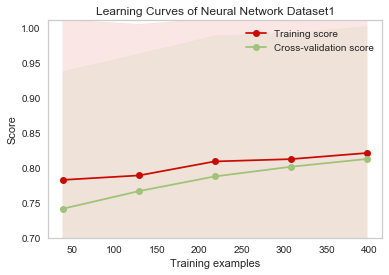

In [119]:
title = "Learning Curves of Neural Network Dataset1" 
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=1)
estimator = Neural_Networks(X,y,GRCV=1)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=5)

In [182]:
mlp = MLPClassifier(hidden_layer_sizes=())
mlp.fit(X_train,y_train)
    

MLPClassifier(hidden_layer_sizes=())

In [183]:
mlp=MLPClassifier(activation='identity', alpha=0.05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

#### Dataset2

In [178]:
nn2_model = MLPClassifier(hidden_layer_sizes=(6, 2), random_state=7, max_iter=1000)
nn2_model.fit(X_train2, y_train2)
y_pred2 = nn2_model.predict(X_test2)
nn_accuracy2 = accuracy_score(y_test2, y_pred2)
print('Accuracy of neural network without hyperparameter tuning is %.2f%%' % (nn_accuracy2 * 100))

Accuracy of neural network without hyperparameter tuning is 72.75%


In [179]:
#Now lets try to do some evaluation for nn model using cross validation.
model_eval_nn2 = cross_val_score(estimator = nn2_model, X = X_train2, y = y_train2, cv = 10)
model_eval_nn2.mean()

0.7456512605042016

##### Learning Curve of Dataset2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (3,), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'lbfgs'}
DecisionTreeClassifier(max_depth=9, max_features=5, min_samples_leaf=4,
                       min_samples_split=7)
0.7598529411764705


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

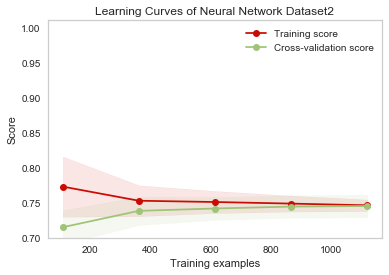

In [124]:
title = "Learning Curves of Neural Network Dataset2" 
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=1)
estimator2 = Neural_Networks(X2,y2,GRCV=1)
plot_learning_curve(estimator2, title, X2, y2, ylim=(0.7, 1.01), cv=cv, n_jobs=5)

In [184]:
mlp2 = MLPClassifier(hidden_layer_sizes=())
mlp2.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=())

In [185]:
mlp2=MLPClassifier(activation='relu', alpha=0.05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## 2.3.Boosting
A boosted version of the decision trees

#### Dataset1

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0).fit(X_train, y_train)
boosted_accuracy = gbc_model.score(X_test, y_test)
print('Accuracy of GradientBoostingClassifier without tuning is %.2f%%' % (boosted_accuracy * 100))

Accuracy of GradientBoostingClassifier without tuning is 95.61%


In [187]:
#Now lets try to do some evaluation for boosting model using cross validation.
model_eval_gbc = cross_val_score(estimator = gbc_model, X = X_train, y = y_train, cv = 10)
model_eval_gbc.mean()

0.956135265700483

##### AUC Score according to different learning rates
- Code Reference:  https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

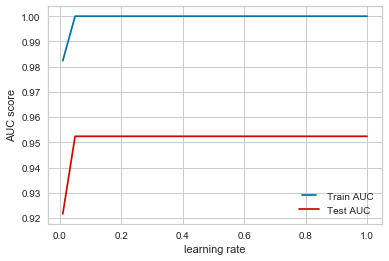

In [131]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

In [227]:
#clf_gb = GradientBoostingClassifier(n_estimators=10, learning_rate=1, max_features=5, max_depth = 5)
def Boosting(X, Y,n_estimator = 10):
    model_name="Gradient Boosting Classifier"
    clf_gb = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate=1.0, max_features=5, max_depth = 5)
    return(clf_gb)


#### Dataset2

In [189]:
gbc2_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train2, y_train2)
boosted_accuracy2 = gbc2_model.score(X_test2, y_test2)
print('Accuracy of Boosting without tuning is %.2f%%' % (boosted_accuracy2 * 100))

Accuracy of Boosting without tuning is 72.50%


##### Learning Curve

In [134]:
#Now lets try to do some evaluation for boosting model using cross validation.
model_eval_gbc2 = cross_val_score(estimator = gbc2_model, X = X_train2, y = y_train2, cv = 10)
model_eval_gbc2.mean()

0.7664635854341737

##### AUC Score according to different learning rates


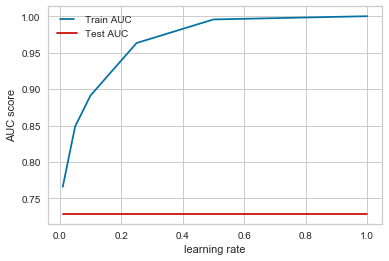

In [135]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train2, y_train2)
    train_pred = model.predict(X_train2)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test2)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test2, y_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

## 2.4.Support Vector Machines




#### Dataset1

In [190]:
from sklearn.svm import SVC
# creating the model
svm_model = SVC()
# feeding the training set into the model
svm_model.fit(X_train, y_train)
# predicting the results for the test set
y_pred = svm_model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", svm_model.score(X_train, y_train))
print("Testing accuracy :", svm_model.score(X_test, y_test))

Training accuracy : 0.9230769230769231
Testing accuracy : 0.9035087719298246


###### Hyper-Parameter Tuning in SVM

In [191]:
# finding the best parameters for the SVC model

def Support_Vector_Machines(X, Y,GRCV=0):
    model_name="Support Vector Machines"
    C=1
    kernel='rbf'
    degree=3
    gamma='scale'
    coef0=0.0
    shrinking=True
    probability=False
    tol=0.001
    random_state=None

    if GRCV:
        clf = SVC()
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'kernel':["linear","rbf"]}
        parameter=GridSearch(X,Y,clf,param_grid,5)
        C=parameter['C']
        kernel=parameter['kernel']

    clf_svm = SVC(C=C, kernel=kernel)
    return(clf_svm)

In [ ]:
title = "Learning Curves of Support Vector Machines Dataset1" 
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
estimator = Support_Vector_Machines(X,y,GRCV=1)
plot_learning_curve(estimator, title, X, y.ravel(), ylim=(0.6, 1.01), cv=cv, n_jobs=5)

#### Dataset2

In [192]:
from sklearn.svm import SVC
# creating the model
svm2_model = SVC()
# feeding the training set into the model
svm2_model.fit(X_train2, y_train2)
# predicting the results for the test set
y_pred2 = svm2_model.predict(X_test2)

# calculating the training and testing accuracies
print("Training accuracy :", svm2_model.score(X_train2, y_train2))
print("Testing accuracy :", svm2_model.score(X_test2, y_test2))

Training accuracy : 0.8098415346121768
Testing accuracy : 0.73


###### Hyper-Parameter Tuning in SVM （dataset2)

In [ ]:
title = "Learning Curves of Support Vector Machines Dataset2" 
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=1)
estimator2 = Support_Vector_Machines(X2,y2,GRCV=1)
plot_learning_curve(estimator2, title, X2, y2.ravel(), ylim=(0.6, 1.01), cv=cv, n_jobs=1)

## 2.5. K-Nearest Neighbors


#### Dataset1

In [197]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [198]:
model_KNN_predictions = knn_model.predict(X_test)

In [199]:
y_test[0:10]

421    0
47     1
292    0
186    1
414    1
132    1
161    1
197    1
245    0
453    0
Name: diagnosis, dtype: int64

In [200]:
print("Accuracy of KNN Without Tuning: {}%".format(knn_model.score(X_test, y_test) * 100 ))


Accuracy of KNN Without Tuning: 92.10526315789474%


###### Learning Curve

In [201]:
def K_Nearest_Neighbors(X, Y,GRCV=0):
    model_name="K Nearest Neighbors"
    n_neighbors=10
    weights='distance'

    if GRCV:
        clf = KNeighborsClassifier()
        param_grid={
        'n_neighbors':[1,2,5,10],
        'weights':['distance','uniform']
        }
        parameter=GridSearch(X,y,clf,param_grid,5)
        n_neighbors=parameter['n_neighbors']
        weights=parameter['weights']

    clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights)
    return(clf_knn)


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

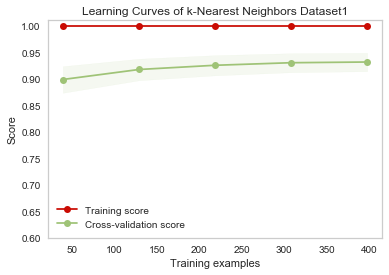

In [202]:
title = "Learning Curves of k-Nearest Neighbors Dataset1" 
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=1)
estimator = K_Nearest_Neighbors(X,y,GRCV=0)
plot_learning_curve(estimator, title, X, y.ravel(), ylim=(0.6, 1.01), cv=cv, n_jobs=5)

##### Dataset2

In [203]:
knn2_model = KNeighborsClassifier(n_neighbors=3)
knn2_model.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=3)

In [204]:
model_KNN_predictions2 = knn2_model.predict(X_test2)


In [205]:
y_test2[0:10]

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [206]:
print("Accuracy of KNN: {}%".format(knn2_model.score(X_test2, y_test2) * 100 ))


Accuracy of KNN: 71.0%


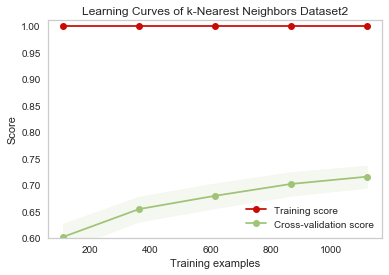

In [207]:
title = "Learning Curves of k-Nearest Neighbors Dataset2" 
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=1)
estimator2 = K_Nearest_Neighbors(X2,y2,GRCV=0)
plot_learning_curve(estimator2, title, X2, y2.ravel(), ylim=(0.6, 1.01), cv=cv, n_jobs=5)
plt.show()

## 3.Result Anylsis (Model Comparation)


##### Without Tuning Comparison: Dataset1

In [228]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Define the models evaluation function
def models_evaluation(X, y, folds): 
    # Perform cross-validation to each machine learning classifier
    dt = cross_validate(dt_model, X, y, cv=folds, scoring=scoring)
    nn = cross_validate(nn_model, X, y, cv=folds, scoring=scoring)
    gbc = cross_validate(gbc_model, X, y, cv=folds, scoring=scoring)
    svm = cross_validate(svm_model, X, y, cv=folds, scoring=scoring)
    knn = cross_validate(knn_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Decision Tree':[dt['test_accuracy'].mean(),
                                                               dt['test_precision'].mean(),
                                                               dt['test_recall'].mean(),
                                                               dt['test_f1_score'].mean()],
                                       
                                      'Neural Network':[nn['test_accuracy'].mean(),
                                                                   nn['test_precision'].mean(),
                                                                   nn['test_recall'].mean(),
                                                                   nn['test_f1_score'].mean()],
                                       
                                      'Boosting':[gbc['test_accuracy'].mean(),
                                                       gbc['test_precision'].mean(),
                                                       gbc['test_recall'].mean(),
                                                       gbc['test_f1_score'].mean()],
                                       
                                      'SVM':[svm['test_accuracy'].mean(),
                                                       svm['test_precision'].mean(),
                                                       svm['test_recall'].mean(),
                                                       svm['test_f1_score'].mean()],
                                       
                                      'KNN':[knn['test_accuracy'].mean(),
                                                              knn['test_precision'].mean(),
                                                              knn['test_recall'].mean(),
                                                              knn['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X, y, 5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Decision Tree,Neural Network,Boosting,SVM,KNN,Best Score
Accuracy,0.919127,0.748471,0.966620,0.912172,0.919143,Boosting
Precision,0.881250,0.375840,0.966761,0.960353,0.916924,Boosting
Recall,0.910410,0.348505,0.943632,0.798117,0.863787,Boosting
F1 Score,0.894092,0.360745,0.954774,0.868547,0.887224,Boosting


In [229]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Define the models evaluation function
def models_evaluation(X, y, folds): 
    # Perform cross-validation to each machine learning classifier
    dt2 = cross_validate(dt2_model, X, y, cv=folds, scoring=scoring)
    nn2 = cross_validate(nn2_model, X, y, cv=folds, scoring=scoring)
    gbc2 = cross_validate(gbc2_model, X, y, cv=folds, scoring=scoring)
    svm2 = cross_validate(svm2_model, X, y, cv=folds, scoring=scoring)
    knn2 = cross_validate(knn2_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Decision Tree':[dt2['test_accuracy'].mean(),
                                                               dt2['test_precision'].mean(),
                                                               dt2['test_recall'].mean(),
                                                               dt2['test_f1_score'].mean()],
                                       
                                      'Neural Network':[nn2['test_accuracy'].mean(),
                                                                   nn2['test_precision'].mean(),
                                                                   nn2['test_recall'].mean(),
                                                                   nn2['test_f1_score'].mean()],
                                       
                                      'Boosting':[gbc2['test_accuracy'].mean(),
                                                       gbc2['test_precision'].mean(),
                                                       gbc2['test_recall'].mean(),
                                                       gbc2['test_f1_score'].mean()],
                                       
                                      'SVM':[svm2['test_accuracy'].mean(),
                                                       svm2['test_precision'].mean(),
                                                       svm2['test_recall'].mean(),
                                                       svm2['test_f1_score'].mean()],
                                       
                                      'KNN':[knn2['test_accuracy'].mean(),
                                                              knn2['test_precision'].mean(),
                                                              knn2['test_recall'].mean(),
                                                              knn2['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X2, y2, 5)

,Decision Tree,Neural Network,Boosting,SVM,KNN,Best Score
Accuracy,0.627851,0.601085,0.713570,0.630991,0.599726,Boosting
Precision,0.661881,0.626654,0.739661,0.613838,0.630536,Boosting
Recall,0.629240,0.865497,0.725146,0.856140,0.640936,Neural Network
F1 Score,0.639380,0.694373,0.726911,0.713417,0.631637,Boosting


In [237]:
import time
from sklearn.metrics import accuracy_score, classification_report,roc_curve, auc, precision_recall_curve, average_precision_score
def Algorithm_Comparison(x,y,models):

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 8))
    accuracy = []
    precision= []
    recall=[]
    names = []
    running_time=[]
    

    for name, model in models:

        start = time.time()
        cv_results = cross_val_score(model,x,y.ravel(),cv=5,scoring='accuracy')
        accuracy.append(cv_results)
        cv_results = cross_val_score(model,x,y.ravel(),cv=5,scoring='precision')
        precision.append(cv_results)
        cv_results = cross_val_score(model,x,y.ravel(),cv=5,scoring='recall')
        recall.append(cv_results)
        names.append(name)
        running_time.append(time.time() - start)
        clf.fit(X_train,y_train.ravel())
        y_train_predict = clf.predict(X_train)
        y_test_predict= clf.predict(X_test)
        roc_prc_train=ROC_PRC_Generation(y_train,y_train_predict)
        roc_cur=roc_prc_train['roc']
        axes[1,0].plot(roc_cur[0], roc_cur[1], label=name+' Train Set ROC_AUC= %0.2f' % roc_cur[2])
        prc_cur=roc_prc_train['prc']
        axes[1,2].plot(prc_cur[0], prc_cur[1], label=name+' Train Set PRC_AUC= %0.2f' % prc_cur[2])

        roc_prc_test=ROC_PRC_Generation(y_test,y_test_predict)
        roc_cur=roc_prc_test['roc']
        axes[1,1].plot(roc_cur[0], roc_cur[1], label=name+' Test Set ROC_AUC= %0.2f' % roc_cur[2])
        roc_cur=roc_prc_test['prc']
        axes[1,3].plot(roc_cur[0], roc_cur[1], label=name+' Test Set PRC_AUC= %0.2f' % roc_cur[2])

    plt.axis('tight')
    axes[0,0].set_title('Accuracy Comparison')
    axes[0,0].boxplot(accuracy)
    axes[0,0].set_xticklabels(names)
    axes[0,1].set_title('Precision Comparison')
    axes[0,1].boxplot(precision)
    axes[0,1].set_xticklabels(names)
    axes[0,2].set_title('Recall Comparison')
    axes[0,2].boxplot(recall)
    axes[0,2].set_xticklabels(names)
    axes[0,3].set_title('Time Comparison')
    axes[0,3].scatter(names,running_time)
    axes[1,0].set_title('ROC curve of Training Set')
    axes[1,0].legend(loc=4,prop={'size': 10})
    axes[1,1].set_title('ROC curve of Testing Set')
    axes[1,1].legend(loc=4,prop={'size': 10})
    axes[1,2].set_title('PRC curve of Training Set')
    axes[1,2].legend(loc=3,prop={'size': 10})
    axes[1,3].set_title('PRC curve of Testing Set')
    axes[1,3].legend(loc=3,prop={'size': 10})
    # axes[3].set_xticklabels(names)
    plt.show()

In [238]:
def Models_Comparation(X,y,Models_param):

    models = []

    if Models_param['DT']:
        models.append(('DT',clf))
    if Models_param['NN']:
        clf_nn=Models_param['NN_model']
        models.append(('NN',clf))
    if Models_param['Boosting']:
        clf_gb=Boosting(X,y,Models_param['Boosting_n_estimator'])
        models.append(('Boosting',clf_gb))
    if Models_param['SVM']:
        clf_svm=Support_Vector_Machines(X,y,Models_param['SVM_GridSearch'])
        models.append(('SVM',clf))
    if Models_param['KNN']:
        clf_knn=K_Nearest_Neighbors(X,y,Models_param['KNN_GridSearch'])
        models.append(('KNN',clf))

    Algorithm_Comparison(X,y,models)

In [239]:
def ROC_PRC_Generation(y, y_predict):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_predict)
    precision, recall, thresholds = precision_recall_curve(y, y_predict)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    prc_auc= auc(precision, recall)
    return({'roc':[false_positive_rate,true_positive_rate,roc_auc],'prc':[precision, recall,prc_auc]})

{'C': 10, 'kernel': 'linear'}
DecisionTreeClassifier(max_depth=6, max_features=5, min_samples_leaf=2)
0.7531652661064425
{'n_neighbors': 5, 'weights': 'distance'}
DecisionTreeClassifier(max_depth=6, max_features=5, min_samples_leaf=2)
0.7531652661064425


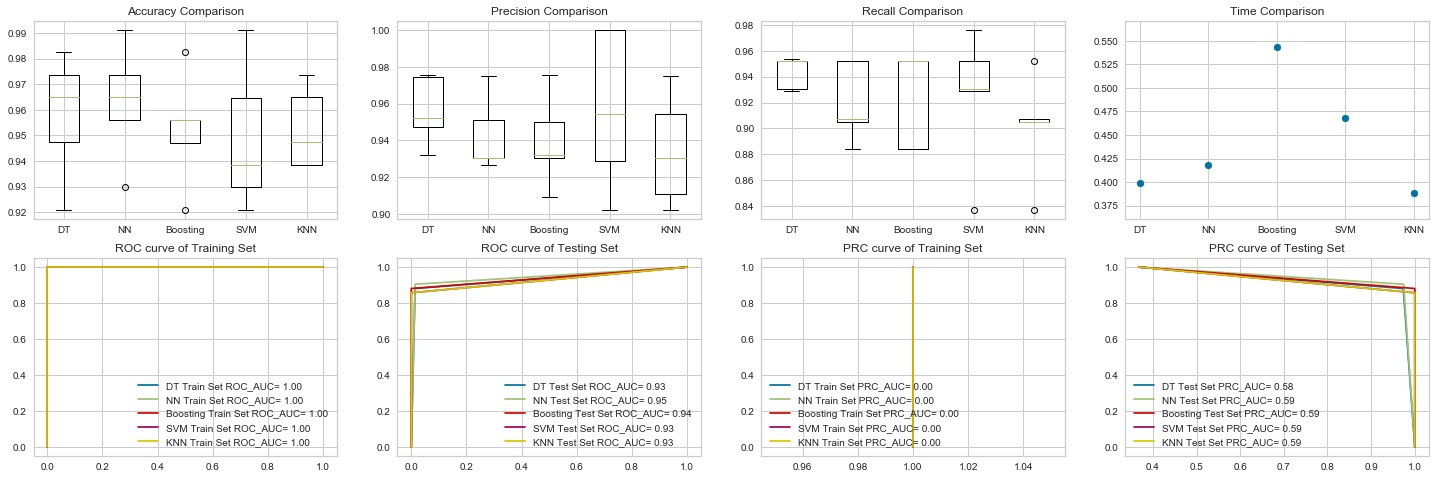

In [240]:
Models_param = {
    'DT' : True,
    'DT_GridSearch':True,
    'NN': True,
    'NN_model':mlp,
    'DT_GridSearch': True,
    'Boosting' : True,
    'Boosting_n_estimator':10,
    'SVM':True,
    'SVM_GridSearch':True,
    'KNN' : True,
    'KNN_GridSearch':True,
    }
Models_Comparation(X,y,Models_param)

In [242]:
def Models_Comparation2(X,y,Models_param):

    models2 = []

    if Models_param['DT']:
        models2.append(('DT',clf2))
    if Models_param['NN']:
        clf_nn=Models_param['NN_model']
        models2.append(('NN',clf))
    if Models_param['Boosting']:
        clf_gb=Boosting(X,y,Models_param['Boosting_n_estimator'])
        models2.append(('Boosting',clf))
    if Models_param['SVM']:
        clf_svm=Support_Vector_Machines(X,y,Models_param['SVM_GridSearch'])
        models2.append(('SVM',clf))
    Algorithm_Comparison(X2,y2,models2)

{'C': 1, 'kernel': 'linear'}
DecisionTreeClassifier(max_depth=6, max_features=5, min_samples_leaf=2)
0.7531652661064425


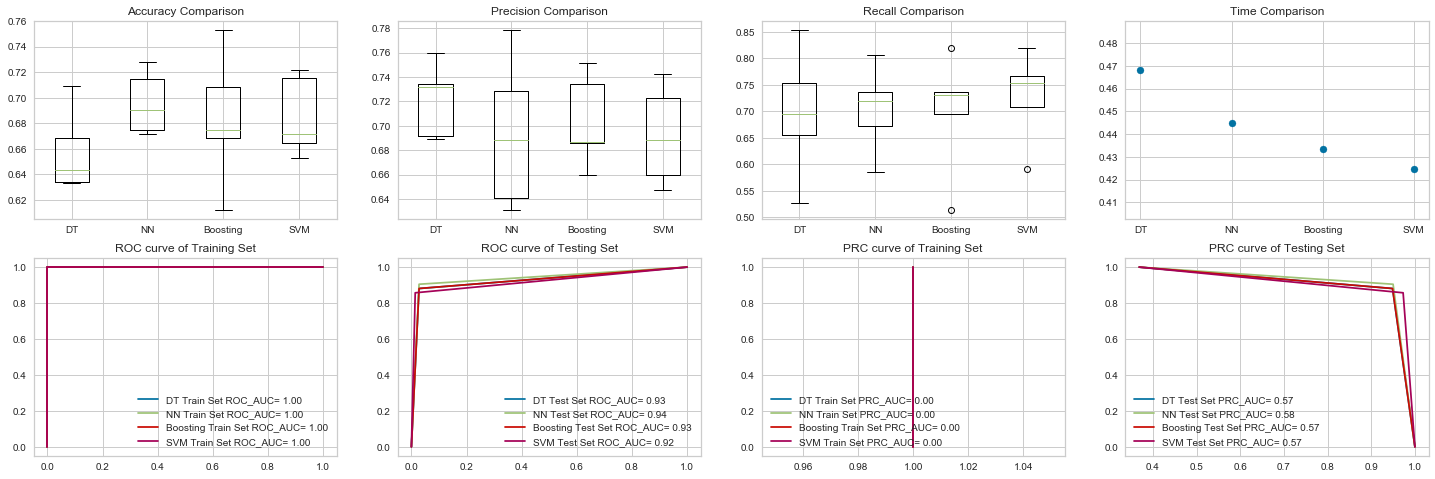

In [243]:
Models_param2 = {
    'DT' : True,
    'DT_GridSearch':True,
    'NN': True,
    'NN_model':mlp2,
    'DT_GridSearch':True,
    'Boosting' : True,
    'Boosting_n_estimator':10,
    'SVM':True,
    'SVM_GridSearch':True,
    'KNN' : True,
    'KNN_GridSearch':True,
    }
Models_Comparation2(X2,y2,Models_param2)